# REPRESENTACIÓN DE ENERGÍA MEDIA POR SITIO FRENTE A T

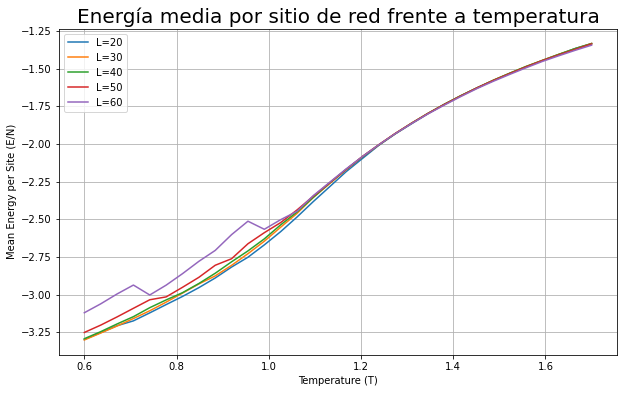

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_mean_energies_per_site(directory, L):
    file_path = os.path.join(directory, f'mean_energy_{directory}.data')
    data = np.loadtxt(file_path)
    temperatures = data[:, 0]
    mean_energies = data[:, 1] / (L * L)  # Cálculo de la energía media por sitio
    return temperatures, mean_energies

# Directorios donde se hayan guardado los datos de energía media
directories = ['energiasL=20', 'energiasL=30', 'energiasL=40', 'energiasL=50', 'energiasL=60']

plt.figure(figsize=(10, 6))

for directory in directories:
    L = int(directory.split('=')[1])  
    temperatures, mean_energies_per_site = load_mean_energies_per_site(directory, L)
    plt.plot(temperatures, mean_energies_per_site, label=f'L={L}')

plt.xlabel('Temperature (T)')
plt.ylabel('Mean Energy per Site (E/N)')
plt.title('Energía media por sitio de red frente a temperatura', fontsize=20)
plt.legend()
plt.grid(True)
plt.savefig('energias.pdf')
plt.show()


# CONFIGURACIÓN Y FUNCIÓN DE CORRELACIÓN PARA LAS TRES PRIMERAS TEMPERATURAS

## PLOTS LOG-LOG 

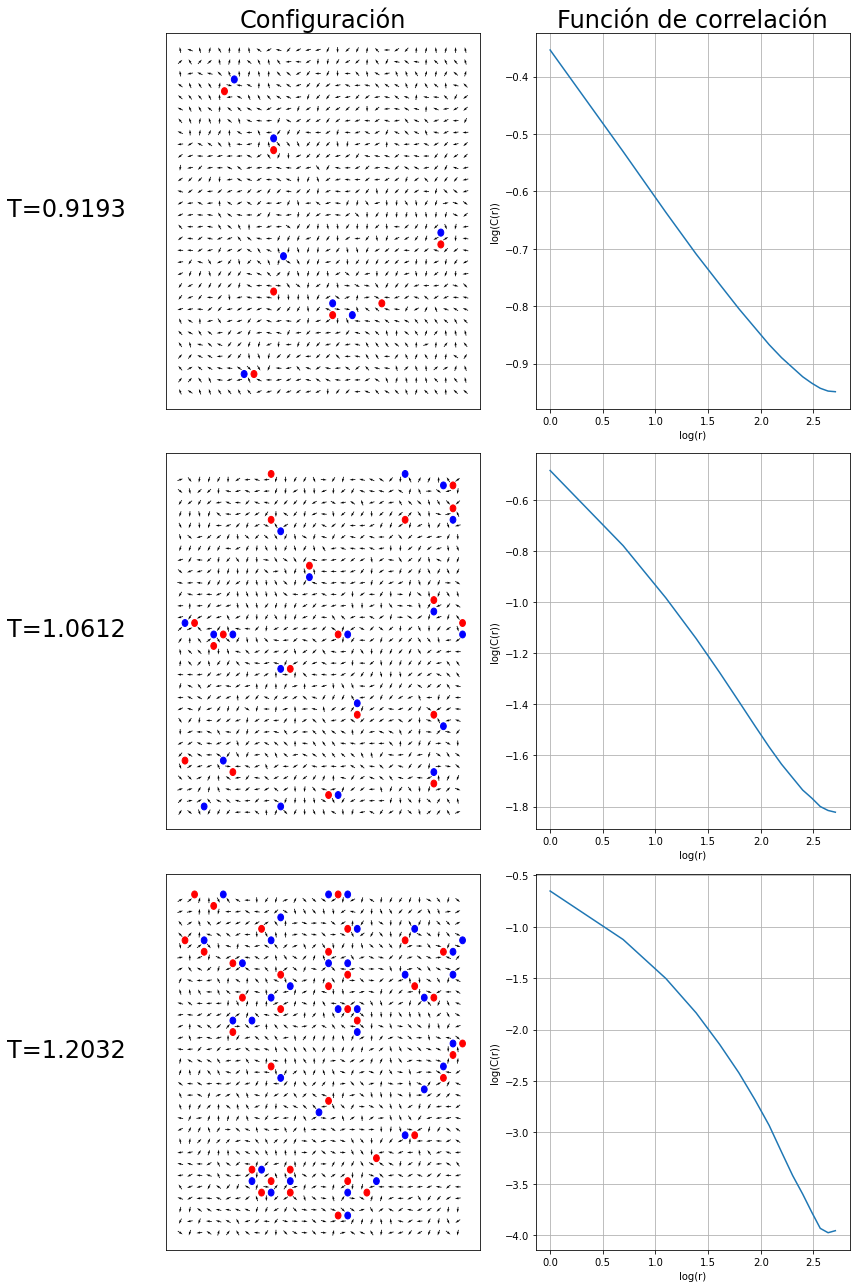

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_configuration(file_path):
    config = np.loadtxt(file_path)
    config = np.mod(config, 2 * np.pi)
    return config

def load_mean_correlations(directory, filename_pattern, temperatures):
    mean_correlations = {}
    for temp in temperatures:
        temp_str = f"{temp:.4f}".replace('.', '').zfill(5)
        filename = os.path.join(directory, f'{filename_pattern}{temp_str}.data')
        corr_data = np.loadtxt(filename)
        mean_correlations[temp] = corr_data
    return mean_correlations

def calculate_vorticity(config, L):
    tpi = 2 * np.pi
    vorticity_map = np.zeros((L, L))
    for i in range(L):
        for j in range(L):
            platt1 = config[i, j]
            platt1shiftX = config[(i+1) % L, j]
            platt1shiftY = config[i, (j+1) % L]
            platt1shiftXshiftY = config[(i+1) % L, (j+1) % L]

            platt1v = np.mod(platt1, tpi)
            platt1shiftXv = np.mod(platt1shiftX, tpi)
            platt1shiftXshiftYv = np.mod(platt1shiftXshiftY, tpi)
            platt1shiftYv = np.mod(platt1shiftY, tpi)
            diff_list1 = np.array([platt1v - platt1shiftXv, platt1shiftXv - platt1shiftXshiftYv, platt1shiftXshiftYv - platt1shiftYv, platt1shiftYv - platt1v])

            vort_here = 0.0
            for ll_1 in diff_list1:
                if ll_1 > np.pi:
                    ll_1 -= tpi
                if ll_1 < -np.pi:
                    ll_1 += tpi
                ll_1 /= tpi
                vort_here += ll_1

            vorticity_map[i, j] = vort_here
    return vorticity_map

def plot_config_and_corr(configs, mean_correlations, L, temperatures, log_vs_log):
    fig, axes = plt.subplots(len(temperatures), 2, figsize=(12, 6 * len(temperatures)))

    x, y = np.meshgrid(np.arange(L), np.arange(L))

    
    for i, temp in enumerate(temperatures):
        ax = axes[i, 0]
        config = configs[temp].reshape(L, L)
        vorticity = calculate_vorticity(config, L)
        u = np.cos(config)
        v = np.sin(config)
        ax.quiver(x, y, u, v, pivot='middle')
        for ii in range(L):
            for jj in range(L):
                if np.isclose(vorticity[ii, jj], 1.0, atol=0.0001):
                    ax.add_patch(plt.Circle((jj + 0.5, ii + 0.5), 0.3, color='red', fill=True))
                elif np.isclose(vorticity[ii, jj], -1.0, atol=0.0001):
                    ax.add_patch(plt.Circle((jj + 0.5, ii + 0.5), 0.3, color='blue', fill=True))
        ax.set_xticks([])
        ax.set_yticks([])

        ax = axes[i, 1]
        corr = mean_correlations[temp]
        r = np.arange(1, len(corr) + 1)
        log_corr = np.log(corr)

        if log_vs_log:
            ax.plot(np.log(r[:L//2]), log_corr[:L//2], label=f'T={temp:.4f}')
            ax.set_xlabel('log(r)')
        else:
            ax.plot(r[:L//2], log_corr[:L//2], label=f'T={temp:.4f}')
            ax.set_xlabel('r')

        ax.set_ylabel('log(C(r))')
        ax.grid(True)

        if i == 0:
            axes[i, 0].set_title('Configuración', fontsize=24)
            axes[i, 1].set_title('Función de correlación', fontsize=24)
        axes[i, 0].set_ylabel(f'T={temp:.4f}', fontsize=24, rotation=0, labelpad=40, ha='right')

    plt.tight_layout()
    plt.savefig('configycorrlog.pdf')
    plt.show()

# Directorio con las configuraciones y funciones de correlación
directory = 'energiasL=30'

filename_pattern = 'mean_corratT='
L = 30  # Longitud de la red

# Temperaturas a representar
temperatures = [0.9193, 1.0612, 1.2032]

# Variable para determinar el tipo de gráfica
log_vs_log = True  # Cambiar a False para graficar log(C) vs r


configs = {}
for temp in temperatures:
    temp_str = f"{temp:.4f}".replace('.', '').zfill(5)
    config_file = os.path.join(directory, f'configatT={temp_str}.data')
    configs[temp] = load_configuration(config_file)


mean_correlations = load_mean_correlations(directory, filename_pattern, temperatures)


plot_config_and_corr(configs, mean_correlations, L, temperatures, log_vs_log)


# CONFIGURACIÓN Y FUNCIÓN DE CORRELACIÓN PARA LAS TRES ÚLTIMAS TEMPERATURAS

## PLOTS LOG-LINEALES

<ipython-input-33-ad95363b19c4>:26: RuntimeWarning: invalid value encountered in log
  log_corr = np.log(corr)


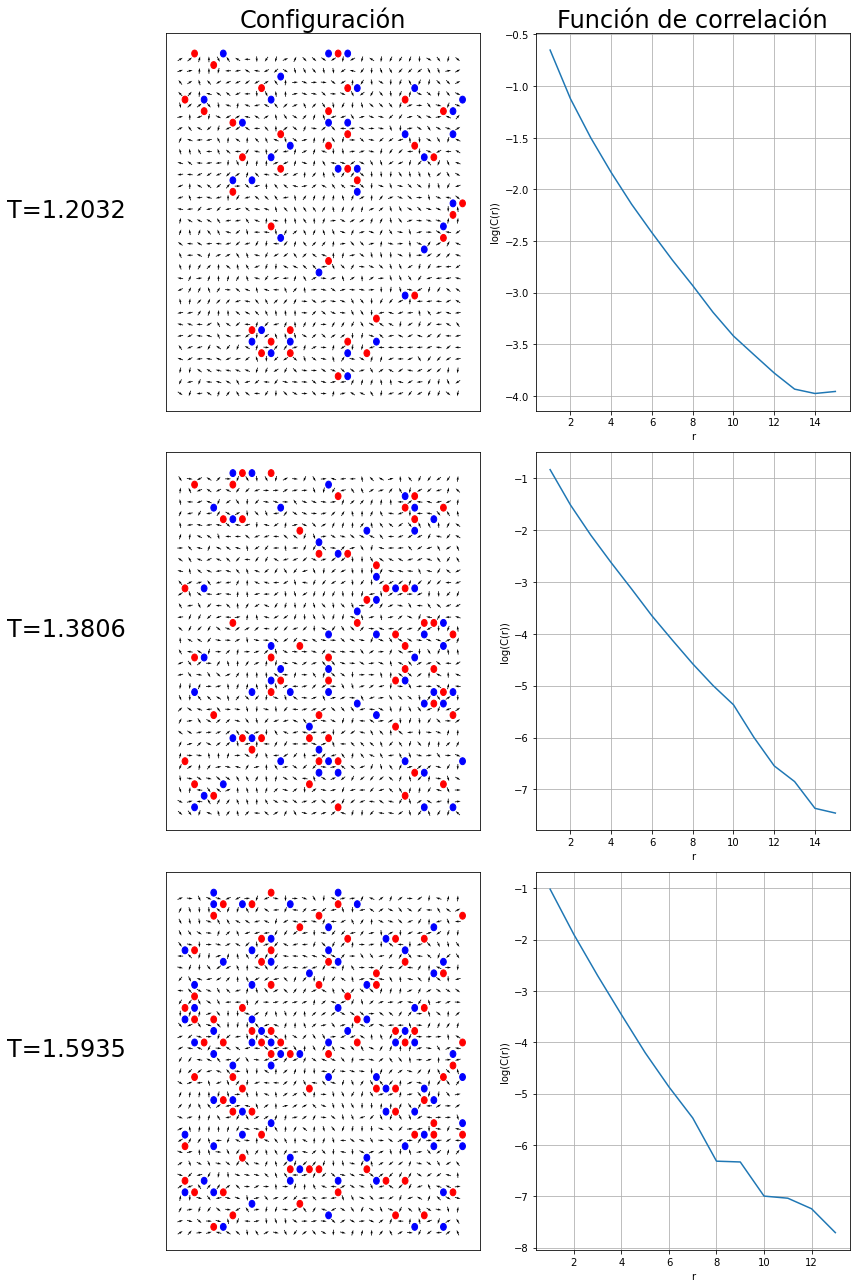

In [33]:
def plot_config_and_corr(configs, mean_correlations, L, temperatures, log_vs_log):
    fig, axes = plt.subplots(len(temperatures), 2, figsize=(12, 6 * len(temperatures)))

    x, y = np.meshgrid(np.arange(L), np.arange(L))

    
    for i, temp in enumerate(temperatures):
        ax = axes[i, 0]
        config = configs[temp].reshape(L, L)
        vorticity = calculate_vorticity(config, L)
        u = np.cos(config)
        v = np.sin(config)
        ax.quiver(x, y, u, v, pivot='middle')
        for ii in range(L):
            for jj in range(L):
                if np.isclose(vorticity[ii, jj], 1.0, atol=0.001):
                    ax.add_patch(plt.Circle((jj + 0.5, ii + 0.5), 0.3, color='red', fill=True))
                elif np.isclose(vorticity[ii, jj], -1.0, atol=0.001):
                    ax.add_patch(plt.Circle((jj + 0.5, ii + 0.5), 0.3, color='blue', fill=True))
        ax.set_xticks([])
        ax.set_yticks([])

        ax = axes[i, 1]
        corr = mean_correlations[temp]
        r = np.arange(1, len(corr) + 1)
        log_corr = np.log(corr)

        if log_vs_log:
            ax.plot(np.log(r[:L//2]), log_corr[:L//2], label=f'T={temp:.4f}')
            ax.set_xlabel('log(r)')
        else:
            ax.plot(r[:L//2], log_corr[:L//2], label=f'T={temp:.4f}')
            ax.set_xlabel('r')

        ax.set_ylabel('log(C(r))')
        ax.grid(True)

        if i == 0:
            axes[i, 0].set_title('Configuración', fontsize=24)
            axes[i, 1].set_title('Función de correlación', fontsize=24)
        axes[i, 0].set_ylabel(f'T={temp:.4f}', fontsize=24, rotation=0, labelpad=40, ha='right')

    plt.tight_layout()
    plt.savefig('configycorrlin.pdf')
    plt.show()

    
#El directorio ya ha sido especificado en la celda anterior    
# Temperaturas a representar
temperatures = [1.2032, 1.3806, 1.5935]

# Variable para determinar el tipo de gráfica
log_vs_log = False  # Cambiar a True para graficar log(C) vs log(r)


configs = {}
for temp in temperatures:
    temp_str = f"{temp:.4f}".replace('.', '').zfill(5)
    config_file = os.path.join(directory, f'configatT={temp_str}.data')
    configs[temp] = load_configuration(config_file)


mean_correlations = load_mean_correlations(directory, filename_pattern, temperatures)


plot_config_and_corr(configs, mean_correlations, L, temperatures, log_vs_log)

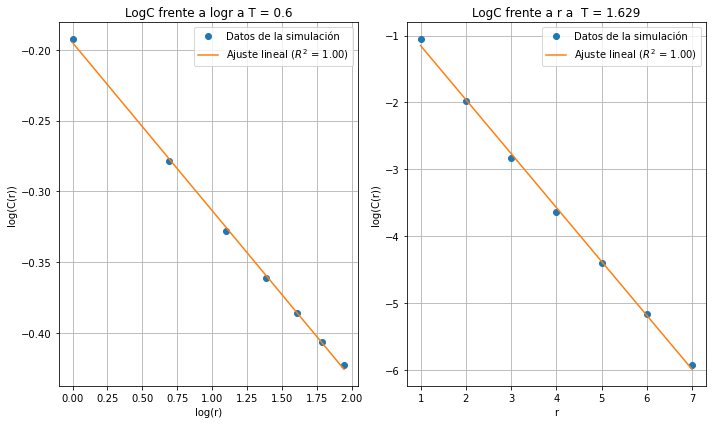

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import linregress

def load_mean_correlations(filename):
    return np.loadtxt(filename)


#Función para representar la selección de datos y realizar los ajustes lineales
def plot_log_correlations(mean_corr1, mean_corr2, temp1, temp2, L):
    maxr1=7                         #Cambiar estos rangos según sea necesario
    maxr2=7                         #Cambiar estos rangos según sea necesario
    
    r1 = np.arange(1, maxr1+1) 
    r2= np.arange(1,maxr2+1)
    plt.figure(figsize=(10, 6))
    
    
    plt.subplot(1, 2, 1)
    log_r = np.log(r1)
    log_mean_corr1 = np.log(mean_corr1[:maxr1]) 
    
    # Ajuste lineal de la primera correlación
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(log_r, log_mean_corr1)
    fit1 = slope1 * log_r + intercept1
    r_squared1 = r_value1**2
    
    plt.plot(log_r, log_mean_corr1, 'o', label=f'Datos de la simulación')
    plt.plot(log_r, fit1, label=f'Ajuste lineal ($R^2$ = {r_squared1:.2f})')
    plt.xlabel('log(r)')
    plt.ylabel('log(C(r))')
    plt.title(f'LogC frente a logr a T = {temp1}')
    plt.grid(True)
    plt.legend()

    
    plt.subplot(1, 2, 2)
    log_mean_corr2 = np.log(mean_corr2[:maxr2]) 
    
    # Ajuste lineal de la segunda correlación
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(r2, log_mean_corr2)
    fit2 = slope2 * r2 + intercept2
    r_squared2 = r_value2**2
    
    plt.plot(r2, log_mean_corr2, 'o', label=f'Datos de la simulación')
    plt.plot(r2, fit2, label=f'Ajuste lineal ($R^2$ = {r_squared2:.2f})')
    plt.xlabel('r')
    plt.ylabel('log(C(r))')
    plt.title(f'LogC frente a r a  T = {temp2}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig('corrlineales2.pdf')
    plt.show()


def main():
    directory = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\energiasL=30'  # Cambiar esta ruta según sea necesario
    temp1 = 0.6
    temp2 = 1.6290
    L = 30          #Cambiar dependiendo de la longitud que se esté teniendo en cuennta
    
    temp1_str = str(int(temp1 * 10000)).zfill(5)
    temp2_str = str(int(temp2 * 10000)).zfill(5)
    
    mean_corr_file1 = os.path.join(directory, f'mean_corratT={temp1_str}.data')
    mean_corr_file2 = os.path.join(directory, f'mean_corratT={temp2_str}.data')
    
    mean_corr1 = load_mean_correlations(mean_corr_file1)
    mean_corr2 = load_mean_correlations(mean_corr_file2)
    
    plot_log_correlations(mean_corr1, mean_corr2, temp1, temp2, L)


if __name__ == "__main__":
    main()